In [1]:
# Import Libs
import time
init_time = time.time()

import os
import pickle
import numpy as np
import ROOT

from functions import HistogramFunctions,AuxiliarFunctions,FigureFunctions,FitFunctions,rootnotes

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.handlelength'] = 3
plt.rcParams['legend.borderpad'] = 0.3
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['ytick.labelsize'] = 20

current_time = time.time()
print 'Time to import libraries: %1.3f seconds'%(current_time-init_time)


Time to import libraries: 0.968 seconds


In [2]:
# Import Libs
import time
init_time = time.time()

import os
import pickle
import numpy as np
import ROOT

from functions import HistogramFunctions,AuxiliarFunctions,FigureFunctions,FitFunctions,rootnotes

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)

In [4]:
import ROOT


# for histograms
bins = 60
m_max = 600
m_min = 0

ylabel = "Occurrences"

# Use Colors
list_color = []
list_color.append(ROOT.kRed+1) # eta < 2.5
list_color.append(ROOT.kGreen+1) # eta < 3.0
list_color.append(ROOT.kBlue+1) # eta < 3.5

#  Make a list of mass histogram
list_inf_M = []

hist_inf = HistogramFunctions.OneDimHistInfo("Sum of Energy for #eta < 2.5 ","h_Eta_2.5",bins,m_min,m_max,"Energy",ylabel)
list_inf_M.append(hist_inf)


hist_inf = HistogramFunctions.OneDimHistInfo("Sum of Energy for #eta < 3.0 ","h_Eta_3.0",bins,m_min,m_max,"Energy",ylabel)
list_inf_M.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Sum of Energy for #eta < 3.5","h_Eta_3.5",bins,m_min,m_max,"Energy",ylabel)
list_inf_M.append(hist_inf)

list_hist_M = HistogramFunctions.CreateListOf1DHistograms(list_inf_M,list_color)
c = rootnotes.canvas("c", (800, 600))
d = rootnotes.canvas("d", (800, 600))

list_hist_M

[<ROOT.TH1F object ("h_Eta_2.5") at 0x2cb6040>,
 <ROOT.TH1F object ("h_Eta_3.0") at 0x2d15bd0>,
 <ROOT.TH1F object ("h_Eta_3.5") at 0x2377350>]

1.17945849895
<3.5
< 3.0
<2.5
1.0717022419
<3.5
< 3.0
<2.5
1.50405371189
<3.5
< 3.0
<2.5
0.00303169200197
<3.5
< 3.0
<2.5
2.07559704781
<3.5
< 3.0
<2.5
0.497250199318
<3.5
< 3.0
<2.5
1.95876502991
<3.5
< 3.0
<2.5
1.29457080364
<3.5
< 3.0
<2.5
0.491243839264
<3.5
< 3.0
<2.5
1.53423440456
<3.5
< 3.0
<2.5
0.0658936575055
<3.5
< 3.0
<2.5
0.290830522776
<3.5
< 3.0
<2.5
0.94514477253
<3.5
< 3.0
<2.5
1.59371721745
<3.5
< 3.0
<2.5
0.740425407887
<3.5
< 3.0
<2.5
1.40348553658
<3.5
< 3.0
<2.5
0.611208081245
<3.5
< 3.0
<2.5
0.873194336891
<3.5
< 3.0
<2.5
1.00235390663
<3.5
< 3.0
<2.5
0.208443984389
<3.5
< 3.0
<2.5
0.581146121025
<3.5
< 3.0
<2.5
1.57670712471
<3.5
< 3.0
<2.5
1.7131742239
<3.5
< 3.0
<2.5
1.68417370319
<3.5
< 3.0
<2.5
0.975373983383
<3.5
< 3.0
<2.5
2.28111338615
<3.5
< 3.0
<2.5


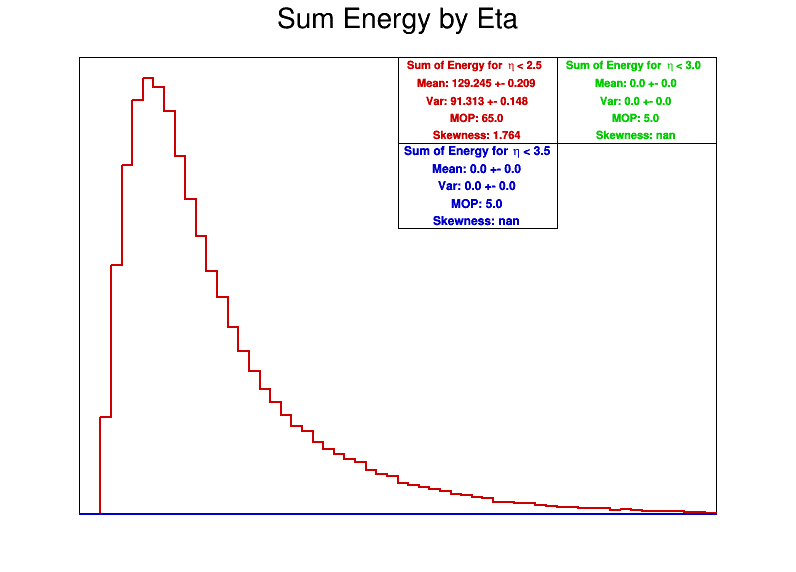

In [10]:
from sklearn.externals import joblib
#Use ROOT in order to create a numpy array with selected variables


#processes = "lvbb125,TTbar,Wbb,Wbl,Wll,Wcl,Wcc,WW,WZ,ZZ"
processes = "lvbb125"
output_path = "/home/isabella/Workspace/python/PtRelAnalysis/PtRelAnalysis/Results/Eta_analysis"

data_path = "/home/isabella/Workspace/Adrian2015/Public/WH/output/local/readPaul_1_0_J1Pt45+2BTag+TruthGENWZ+Clean_1_perevent+perjet"

for process in processes.split(","):
    data_input = data_path+"/"+process+".root"
    treeName = "perevent"
    file = ROOT.TFile(data_input,"READ")
    tree = file.Get(treeName)
    #nrEvents = tree.GetEntries()
    nrEvents = 25

    for (i,entry) in enumerate(tree):
        if nrEvents>0:
            if i>nrEvents:
                break
                
        # variables for EMJESGSCMu j1.     
        E1 = tree.j1_EMJESGSCMu_E
        Eta1 = tree.j1_EMJESGSCMu_Eta
        
        # variables for EMJESGSCMu j2.     
        E2 = tree.j2_EMJESGSCMu_E
        Eta2 = tree.j2_EMJESGSCMu_Eta
        
        lepton_Eta = tree.lep_DEFAULT_Eta
        lepton_E = tree.lep_DEFAULT_E
        
        Eta1 = abs(Eta1)
        Eta2 = abs(Eta2)
        print Eta2
        if Eta2 < 3.5:
            print '<3.5'
        #    list_hist_M[0].Fill(E1)
            if Eta2 < 3.0:
                print "< 3.0"
        #        list_hist_M[1].Fill(E1)
                if Eta2 < 2.5:
                    print '<2.5'
        #            list_hist_M[2].Fill(E1)
                
        #if Eta2 < 2.5:
            #list_hist_M[0].Fill(E2)
        #    if Eta2 < 3.0:
        #        list_hist_M[1].Fill(E2)
        #        if Eta2 < 3.5:
        #            list_hist_M[2].Fill(E2)
        
        #if process == 'lvbb125':        
        #    list_hist_M[0].Fill(PtRel_j1_EMJESGSCMu)
        #if process == 'Wbb':
        #    list_hist_M[1].Fill(PtRel_j1_EMJESGSCMu)
        #if process == 'Wbl':
        #    list_hist_M[2].Fill(PtRel_j1_EMJESGSCMu)
        #if process == 'Wcc':
        #    list_hist_M[3].Fill(PtRel_j1_EMJESGSCMu)
        #if process == 'Wcl':
        #    list_hist_M[4].Fill(PtRel_j1_EMJESGSCMu)
        #if process == 'Wll':
        #    list_hist_M[5].Fill(PtRel_j1_EMJESGSCMu)
        #if process == 'TTbar':
        #    list_hist_M[6].Fill(PtRel_j1_EMJESGSCMu)
        #if process == 'WW':
        #    list_hist_M[7].Fill(PtRel_j1_EMJESGSCMu)
        #if process == 'WZ':
        #    list_hist_M[8].Fill(PtRel_j1_EMJESGSCMu)
        #if process == 'ZZ':
        #    list_hist_M[9].Fill(PtRel_j1_EMJESGSCMu)
                
clone_list_M = []
for hist in list_hist_M:
    newhist = hist.Clone()
    clone_list_M.append(newhist)
    
HistogramFunctions.Draw1DHists(list_hist_M,output_path)
HistogramFunctions.DrawList1DHistInCanvas(clone_list_M, "Sum Energy by Eta", " Energy ", "Events", c)        

c

In [6]:
c.Print(output_path+'/plot_junto_encontro_fisica.pdf')

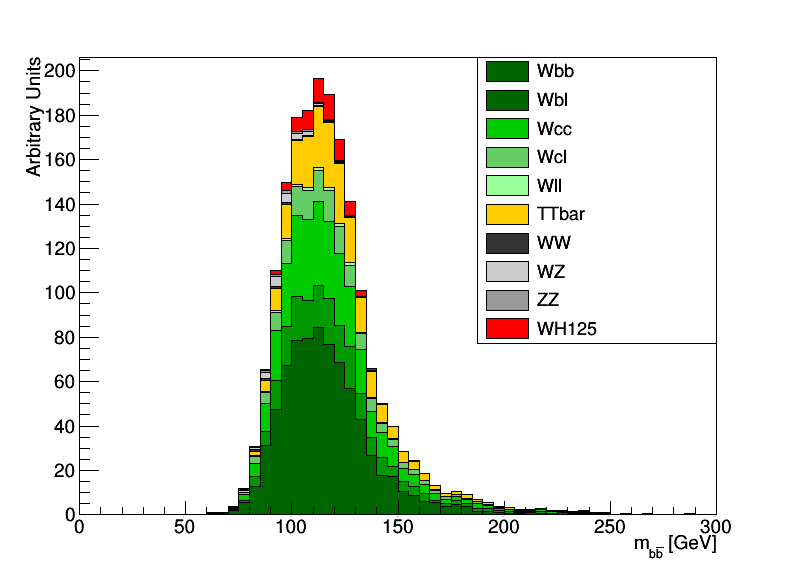

In [25]:
q = rootnotes.canvas("k", (800, 600))
#ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)

hs = ROOT.THStack('hs',"")
leg = ROOT.TLegend(0.9,0.4,0.6,0.9)

clone_list_M[1].SetFillStyle(200)
clone_list_M[1].SetFillColor(ROOT.kNone)
clone_list_M[1].SetFillColor(list_color[1])
clone_list_M[1].SetLineColor(ROOT.kBlack)
hs.Add(clone_list_M[1])
leg.AddEntry(clone_list_M[1],"Wbb","f")

clone_list_M[2].SetFillStyle(200)
clone_list_M[2].SetFillColor(ROOT.kNone)
clone_list_M[2].SetFillColor(list_color[2])
clone_list_M[2].SetLineColor(ROOT.kBlack)
hs.Add(clone_list_M[2])
leg.AddEntry(clone_list_M[1],"Wbl","f")

clone_list_M[3].SetFillStyle(200)
clone_list_M[3].SetFillColor(ROOT.kNone)
clone_list_M[3].SetFillColor(list_color[3])
clone_list_M[3].SetLineColor(ROOT.kBlack)
hs.Add(clone_list_M[3])
leg.AddEntry(clone_list_M[3],"Wcc","f")

clone_list_M[4].SetFillStyle(200)
clone_list_M[4].SetFillColor(ROOT.kNone)
clone_list_M[4].SetFillColor(list_color[4])
clone_list_M[4].SetLineColor(ROOT.kBlack)
hs.Add(clone_list_M[4])
leg.AddEntry(clone_list_M[4],"Wcl","f")

clone_list_M[5].SetFillStyle(200)
clone_list_M[5].SetFillColor(ROOT.kNone)
clone_list_M[5].SetFillColor(list_color[5])
clone_list_M[5].SetLineColor(ROOT.kBlack)
hs.Add(clone_list_M[5])
leg.AddEntry(clone_list_M[5],"Wll","f")

clone_list_M[6].SetFillStyle(200)
clone_list_M[6].SetFillColor(ROOT.kNone)
clone_list_M[6].SetFillColor(list_color[6])
clone_list_M[6].SetLineColor(ROOT.kBlack)
hs.Add(clone_list_M[6])
leg.AddEntry(clone_list_M[6],"TTbar","f")

clone_list_M[7].SetFillStyle(200)
clone_list_M[7].SetFillColor(ROOT.kNone)
clone_list_M[7].SetFillColor(list_color[7])
clone_list_M[7].SetLineColor(ROOT.kBlack)
hs.Add(clone_list_M[7])
leg.AddEntry(clone_list_M[7],"WW","f")

clone_list_M[8].SetFillStyle(200)
clone_list_M[8].SetFillColor(ROOT.kNone)
clone_list_M[8].SetFillColor(list_color[8])
clone_list_M[8].SetLineColor(ROOT.kBlack)
hs.Add(clone_list_M[8])
leg.AddEntry(clone_list_M[8],"WZ","f")

clone_list_M[9].SetFillStyle(200)
clone_list_M[9].SetFillColor(ROOT.kNone)
clone_list_M[9].SetFillColor(list_color[9])
clone_list_M[9].SetLineColor(ROOT.kBlack)
hs.Add(clone_list_M[9])
leg.AddEntry(clone_list_M[9],"ZZ","f")

clone_list_M[0].SetFillStyle(200)
clone_list_M[0].SetFillColor(ROOT.kNone)
clone_list_M[0].SetFillColor(ROOT.kRed)
clone_list_M[0].SetLineColor(ROOT.kBlack)
hs.Add(clone_list_M[0])
leg.AddEntry(clone_list_M[0],"WH125","f")

hs.Draw();
hs.GetXaxis().SetTitle("m_{b#bar{b}} [GeV]");
hs.GetYaxis().SetTitle("Arbitrary Units");
leg.Draw();
#//hs->GetXaxis()->SetRangeUser(50.,150.);
#gPad.Modified();
q.Print(output_path+'/stacked_ENFPC.pdf')
q

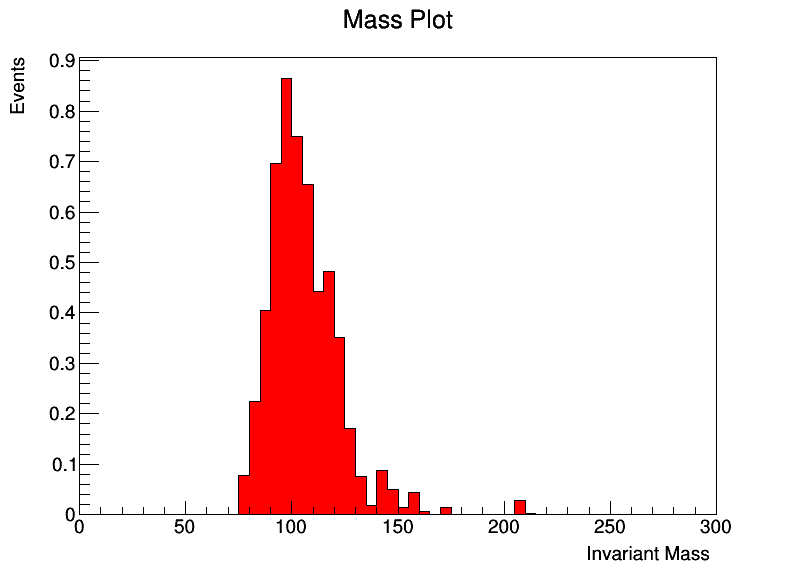

In [35]:
q = rootnotes.canvas("k", (800, 600))
#ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)
clone_list_M[1].SetFillStyle(200)
clone_list_M[1].SetFillColor(ROOT.kNone)
clone_list_M[1].SetFillColor(ROOT.kRed)
clone_list_M[1].Draw()
q

In [9]:
c.Print(output_path+'/predictPlot.pdf')
print list_hist_M[0].GetEntries()
print list_hist_M[1].GetEntries()

64587.0
4948.0
